In this file we produce several plots of the data so as to get a basic understanding of them.

In [1]:
import datetime
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-muted')

/tmp/ipykernel_11060/2738958988.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')


In [2]:
#print(plt.style.available)

In [3]:
import os
path = os.path.join(os.path.expanduser('~'), 'Documents', 'for_edit', 'GERMANY_CLEAN_FULL.xlsx')
print (path)

/home/giorgos/Documents/for_edit/GERMANY_CLEAN_FULL.xlsx


In [4]:
df = pd.read_excel(path)
df = df.set_index('Date Time')
df.index = pd.to_datetime(df.index)
df

,Actual_Load,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),holiday
Date Time,,,,,,,,,,,,,,,,
2012-10-01 01:00:00,39296,997.12,5.85,279.24,3.91,87.30,9.26,8.08,1.18,5.06,8.11,1241.17,3.33,6.13,258.5,0
2012-10-01 02:00:00,39623,997.45,6.05,279.41,3.94,86.30,9.39,8.10,1.29,5.07,8.12,1240.67,3.05,6.29,266.0,0
2012-10-01 03:00:00,41180,998.57,5.38,278.66,3.93,90.30,8.97,8.10,0.87,5.06,8.11,1245.04,2.38,5.81,265.5,0
2012-10-01 04:00:00,44793,999.37,4.54,277.75,2.40,85.90,8.45,7.26,1.19,4.53,7.27,1250.21,1.91,3.76,278.4,0
2012-10-01 05:00:00,53632,1000.05,4.43,277.59,1.57,81.60,8.39,6.84,1.54,4.27,6.84,1251.76,1.85,3.68,282.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-02 13:00:00,68624,971.30,2.97,278.44,-3.15,63.96,7.56,4.84,2.73,3.10,4.98,1223.08,2.92,5.25,229.5,0
2015-02-02 14:00:00,67280,971.26,2.81,278.28,-2.98,65.56,7.48,4.90,2.58,3.15,5.05,1223.71,3.65,6.21,241.4,0
2015-02-02 15:00:00,66108,971.35,2.93,278.40,-2.78,65.91,7.55,4.97,2.57,3.19,5.12,1223.23,1.68,2.80,213.3,0


From this first plot, we can clearly see that temperature and humidity seem to impact electricity demand in some way. This fuels further research into the matter.

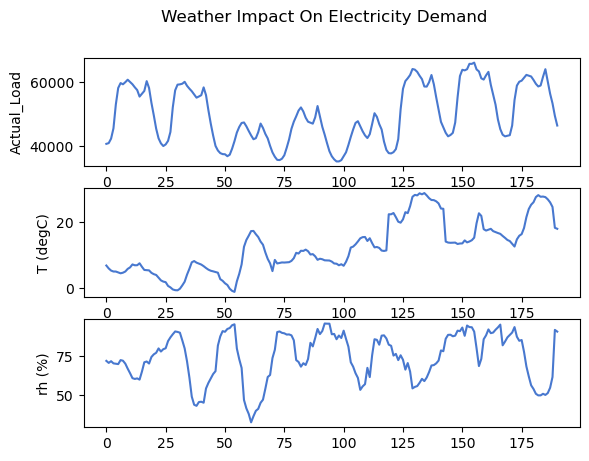

In [5]:
plot_data = df.loc[(df.index > '10-01-2014')&(df.index < '10-09-2014')]

values = plot_data.values
# specify columns to plot
groups = [ 0, 2, 5]
i = 1
# plot each column
fig=plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.ylabel(plot_data.columns[group])
    i += 1
    
fig.suptitle('Weather Impact On Electricity Demand')   
plt.show()

The following plot shows the consumption in one week in Germany.  Obviously, on weekdays the energy demand has a distinct pattern in contrast to the weekends, where much less demand is observed. This could mean that businesses may have significant energy consumption in Germany. Also, this pattern
indicates that activities around the various areas of work may be increasing consumption levels. 

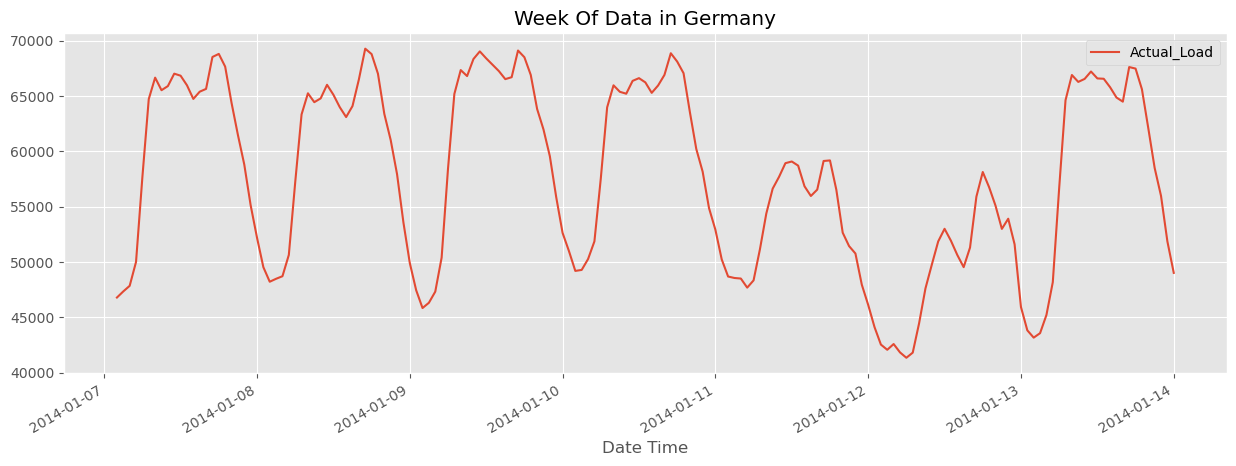

In [6]:
plt.style.use('ggplot')
dfl = df[['Actual_Load']]
dfl.loc[(dfl.index > '01-07-2014 01:00:00') & (dfl.index < '01-14-2014 01:00:00')] \
    .plot(figsize=(15, 5), title='Week Of Data in Germany')
plt.show()

The following procedure is inspired by a similar analysis 

(Rob Mulla. Time Series Forecasting with Machine Learning [YT]. English. url: https://www.kaggle.com/code/robikscube/time- series- forecasting- with- machine-learning-yt.) 

that got adjusted to this project.

In [7]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Dayofweek'] = df.index.dayofweek
    df['Quarter'] = df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Dayofyear'] = df.index.dayofyear
    df['Dayofmonth'] = df.index.day
    df['Weekofyear'] = df.index.isocalendar().week
    return df

dff = create_features(dfl)

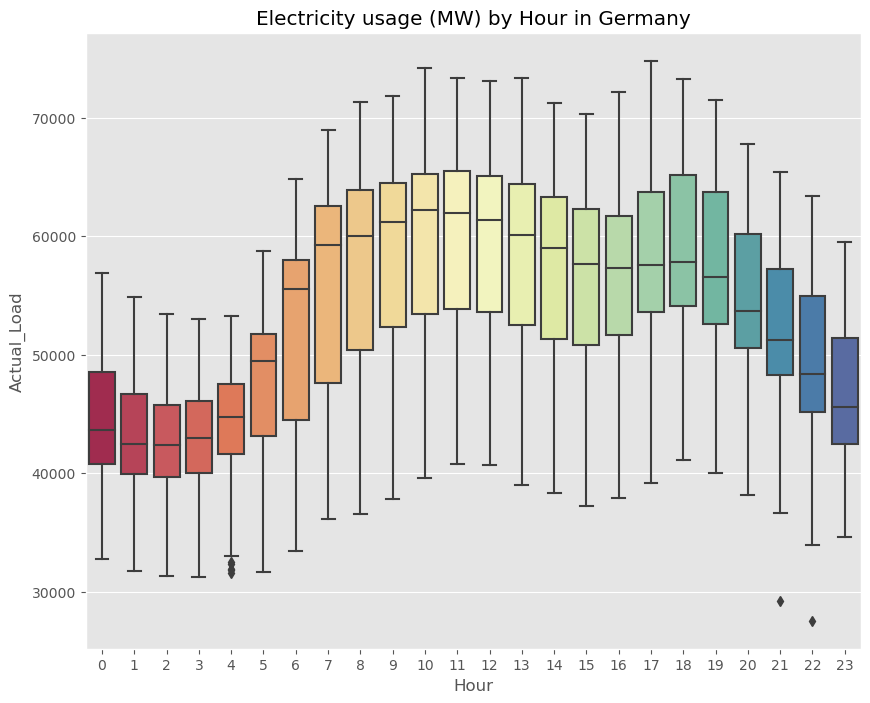

In [8]:
import seaborn as sns
#plt.style.use('seaborn-v0_8-pastel')
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=dff, x='Hour', y='Actual_Load', palette='Spectral')
ax.set_title('Electricity usage (MW) by Hour in Germany')
plt.show()

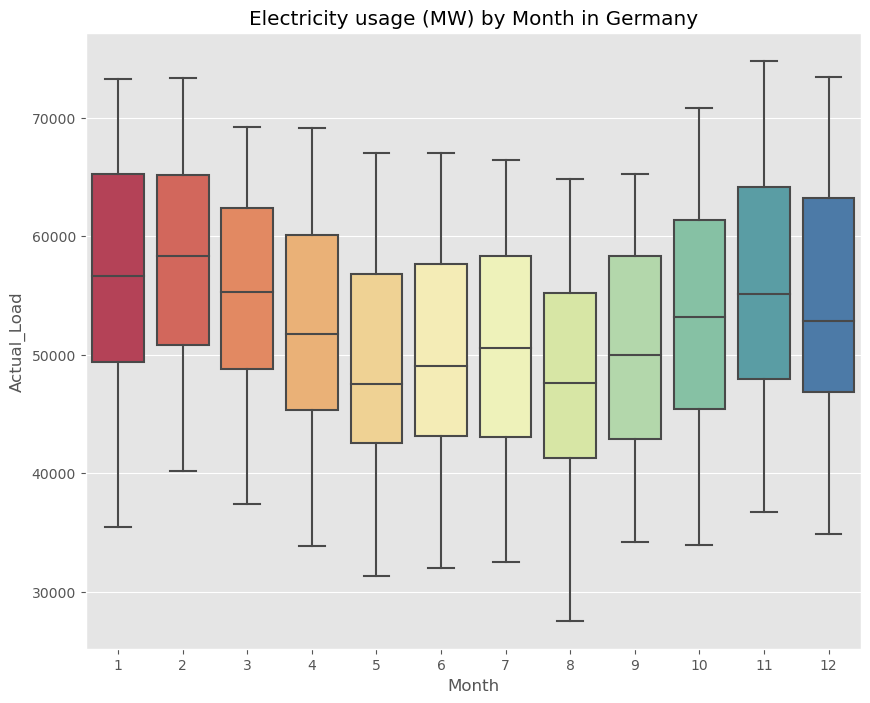

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=dff, x='Month', y='Actual_Load', palette='Spectral')
ax.set_title('Electricity usage (MW) by Month in Germany')
plt.show()

Another class of charts of considerable interest are scatter charts. This kind of plot uses dots or points to represent values for two different numerical variables. Each dot on the horizontal and vertical axis represents a value corresponding to a specific time observation.

From the chart of electricity vs temperature, it can be observed that in general Germany is a country with high energy consumption throughout the year, as indicated by the previous
 diagrams. Regardless of whether it is winter (red dots) or summer
(yellow dots) it is visible that energy demand remains at high levels. The red dots, that refer to winter, seem to indicate the highest cosumption levels.

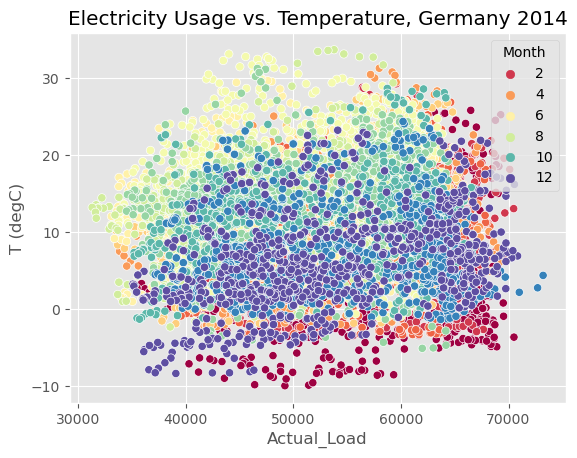

In [10]:
df2 = create_features(df)
df_14 = df2.loc[df2.Year==2014]
plt.clf()
ax = sns.scatterplot(x='Actual_Load',y='T (degC)',hue='Month',data=df_14, palette='Spectral')
ax.set_title('Electricity Usage vs. Temperature, Germany 2014')
plt.show()

A kernel density plot is a form of chart that uses a single continuous curve to show the distribution of values in a data set. It has a lot in common with the histogram, but presents advantages in displaying the shape of the distribution. 

On the opposite side of each variable we can see the density diagrams that represent its distribution. The coloring of the kernel curves as well as the densities refer to the month in which the observations are made.

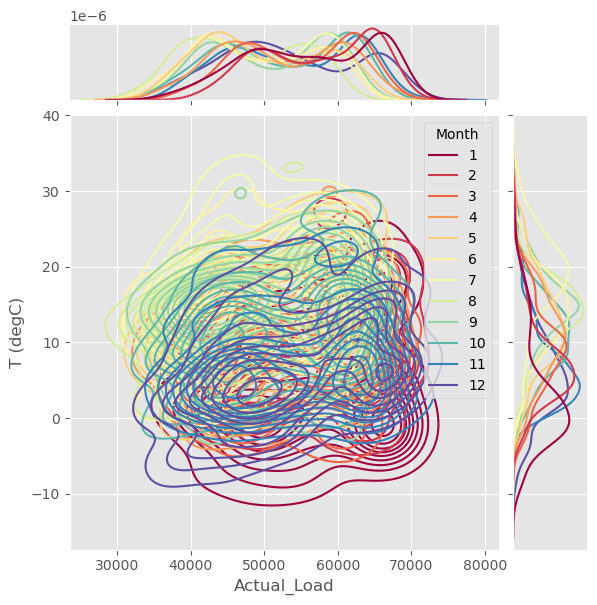

In [11]:
sns.jointplot(x="Actual_Load", y="T (degC)", data=df_14, kind="kde",hue='Month', palette='Spectral')

From the scatter diagram of humidity in relation to consumption, which is presented below, it is easy to notice the fact that in the first months of the year, where the highest demand is noted, high humidity is also noted. The the autumn, the dispersion of consumption is greater while in the warmer months it decreases, along with humidity.

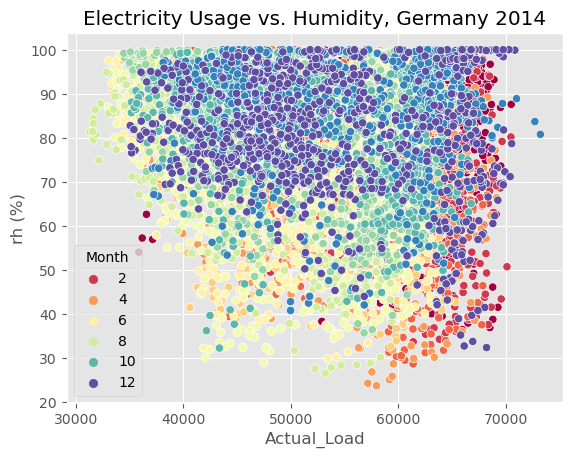

In [12]:
plt.clf()
ax = sns.scatterplot(x='Actual_Load',y='rh (%)',hue='Month',data=df_14, palette='Spectral')
ax.set_title('Electricity Usage vs. Humidity, Germany 2014')
plt.show()

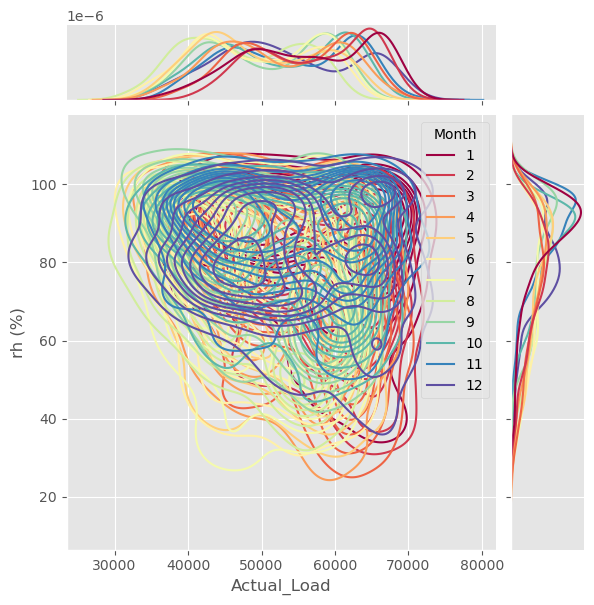

In [13]:
sns.jointplot(x="Actual_Load", y="rh (%)", data=df_14, kind="kde",hue='Month', palette='Spectral')

In the following plot we can see scatter plots of several features of the dataset in relation to each other. On the diagonal we can see the charts of the distribution of each feature, coloured in each month. It is a quick way to make some basic assumptions on our dataset.

/home/giorgos/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

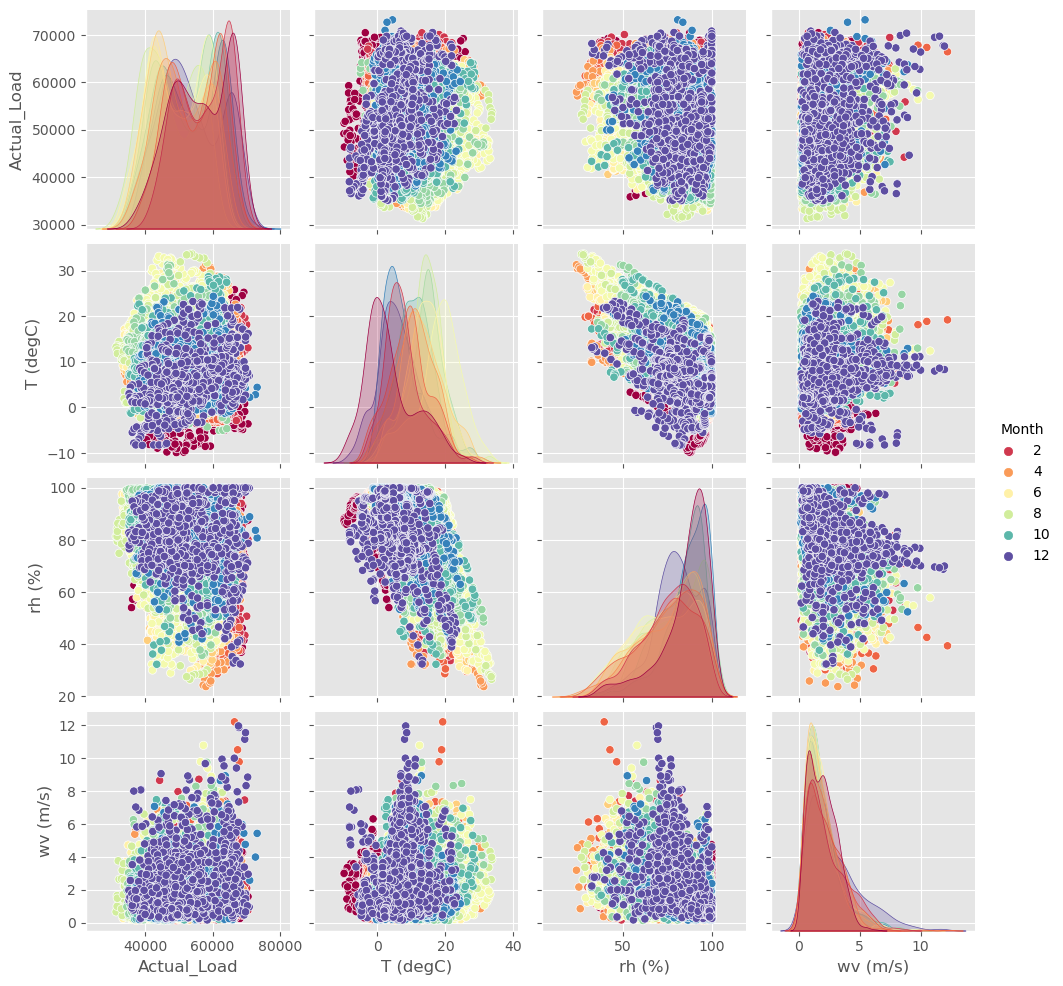

In [14]:
plt.clf()
ax =sns.pairplot(df_14,vars=['Actual_Load','T (degC)','rh (%)','wv (m/s)'],hue='Month', palette='Spectral')
plt.show()